## Julia code를 이용해 python code를 reproduce 하기

[![Hits](https://hits.seeyoufarm.com/api/count/incr/badge.svg?url=https%3A%2F%2Fgithub.com%2Fthereexist%2FPhysical_chemistry_3%2Fblob%2Fmain%2FParticle_in_a_box%2Fparticle_in_a_box_julia.ipynb&count_bg=%2379C83D&title_bg=%23555555&icon=&icon_color=%23E7E7E7&title=hits&edge_flat=false)](https://hits.seeyoufarm.com)

Julia language는 MIT에서 개발하고 있는 free and open source 컴퓨터 언어로, high-level, high-performance를 지향합니다.

코드를 쓰는 방식은 python과 비슷하지만, just-in-time(JIT) compiler를 사용하기에 interpreter language인 python보다 계산이 월등히 빠릅니다.

이러한 장점을 가지고 있기에, 최근에 scientific computing language로 인기가 올라가고 있는 언어입니다.

혹시라도 python의 느린 계산 속도(사실 code를 개선하면 python도 충분히 빠르게 할수는 있습니다..)에 실증을 느끼시는 학생이 있으시다면, Julia를 추천해드립니다.

In [1]:
using Plots

In [2]:
#=
L : potential well의 width
y : particle의 위치
=#

L = 100;
y = 50;

In [3]:
function psi_n(x,n,L)
    return sqrt(2/L)*sin(n/L*pi*x)
end

psi_n (generic function with 1 method)

In [4]:
function f(x,y,n,L)
    result = 0
    for m = 1:n
        result += psi_n(x,m,L)*psi_n(y,m,L)
    end
    return result
end

f (generic function with 1 method)

In [5]:
anim = @animate for i in 1:1000
    plot(x->f(x,y,i,L), range(0,100, length = 10000), label = "n = $i")
end

Animation("C:\\Users\\minho\\AppData\\Local\\Temp\\jl_2nGism", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000991.png", "000992.png", "000993.png", "000994.png", "000995.png", "000996.png", "000997.png", "000998.png", "000999.png", "001000.png"])

┌ Info: Saved animation to 
│   fn = g:\OneDrive\CDLC\강의 자료\2022-1\물리화학 3\Physical_chemistry_3\Particle_in_a_box\result_julia.gif
└ @ Plots C:\Users\minho\.julia\packages\Plots\8K4be\src\animation.jl:114


Plots.AnimatedGif("g:\\OneDrive\\CDLC\\강의 자료\\2022-1\\물리화학 3\\Physical_chemistry_3\\Particle_in_a_box\\result_julia.gif")
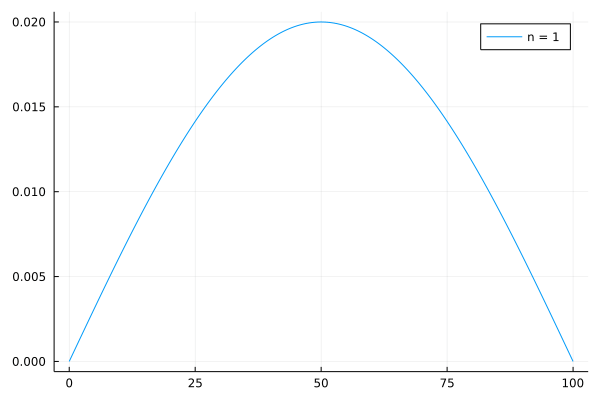

In [6]:
gif(anim, "result_julia.gif", fps = 16)

1번째 결과부터 1000번째 결과까지 plot을 생성하고 이를 gif로 만드는데 시간이 얼마 걸리지 않았다.

이는 python으로 구현하기 어려운 속도이다.

In [7]:
function integrate_f(y,n,L,dx)
    length = trunc(Int, L/dx)
    X = LinRange(0,L,length)
    result = 0
    for x in X
        result += f(x,y,n,L)
    end
    result *= dx

    return result
end

integrate_f (generic function with 1 method)

In [8]:
dx = L/100000

integrate_f(y,1,L,dx)

1.2732268122350046

In [12]:
## 제 pc 기준으로 밑의 계산은 오래 걸리네요.
## 시도해보셔도 좋지만, 결과만 보셔도 좋을 것 같습니다.

dx = L/100000

numbers = zeros(1,300)
for i = 1:300
    numbers[i] = i
end

results = zeros(1,300)

for i = 1:300
    results[i] = integrate_f(y,numbers[i],L,dx)
end

In [13]:
plot(transpose(numbers),transpose(results), label = "result")
plot!([1,1000],[1,1], label = "1")
plot!(xscale=:log)
plot!(xlabel = "n", ylabel =  "integrate results")

$n$의 값이 커짐에 따라, 결과값이 1에 수렴한다는 사실을 확인할 수 있습니다.